# 创建图-连接表和邻接表创建图

在NetworkX中，通过连接表和邻接表创建图。

推荐代码运行云GPU平台：https://featurize.cn?s=d7ce99f842414bfcaea5662a97581bd1

同济子豪兄 2023-1-16

斯坦福大学CS224W图机器学习公开课-同济子豪兄中文精讲-视频链接、中文笔记课件、论文笔记、代码、思考题、扩展阅读、答疑群：https://github.com/TommyZihao/zihao_course/tree/main/CS224W


## 参考文档

https://networkx.org/documentation/stable/auto_examples/basic/plot_read_write.html#sphx-glr-auto-examples-basic-plot-read-write-py

## 导入工具包

In [1]:
import networkx as nx
import numpy as np
import random # 随机数
import pandas as pd

# 数据可视化
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 设置matplotlib中文字体

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-01-16 23:08:55--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  14.6MB/s    用时 0.7s    

2023-01-16 23:08:56 (14.6 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



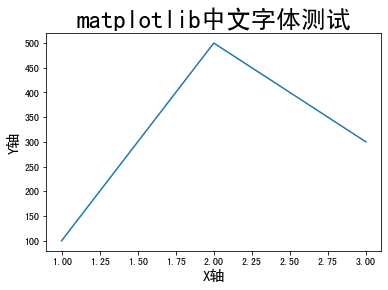

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入三元组连接表

数据来源：OpenKG-四大名著人物关系知识图谱和OWL本体：http://www.openkg.cn/dataset/ch4masterpieces

In [6]:
# 导入 csv 文件定义的三元组连接表，构建有向图
df = pd.read_csv('triples.csv')

In [7]:
df

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子
...,...,...,...,...
148,曹植,曹丕,younger_brother,弟弟
149,马谡,诸葛亮,colleague,同事
150,马谡,刘备,minister,臣
151,孙坚,孙权,father,父亲


## 通过连接表Edge List创建图

In [8]:
G = nx.DiGraph()

In [9]:
edges = [edge for edge in zip(df['head'], df['tail'])]

G.add_edges_from(edges)

In [10]:
G.edges('关羽')

OutEdgeDataView([('关羽', '刘备'), ('关羽', '张飞')])

## 可视化

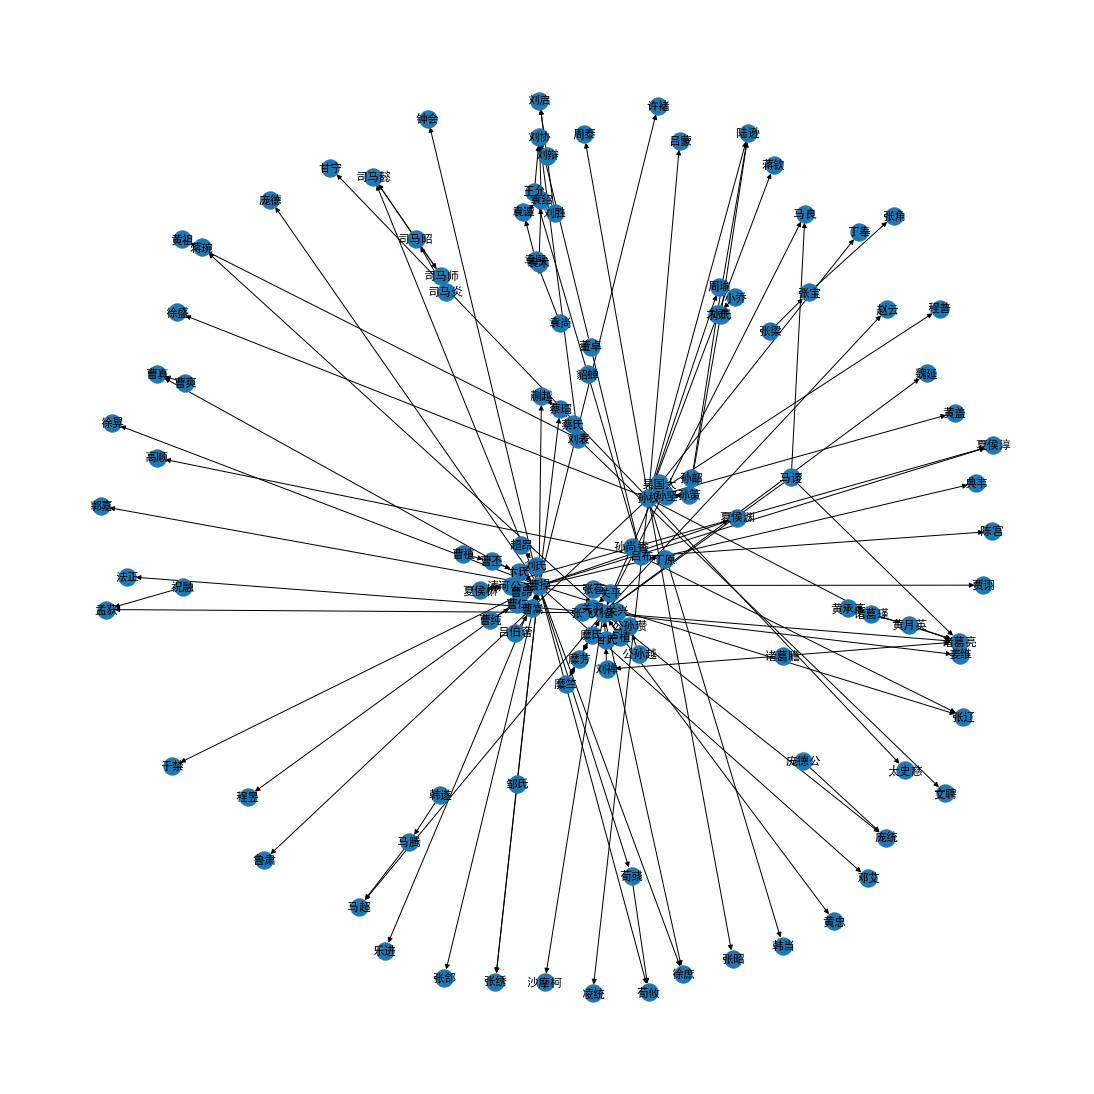

In [11]:
# 节点排版布局-默认弹簧布局
pos = nx.spring_layout(G, seed=123)

plt.figure(figsize=(15,15))
nx.draw(G, pos=pos, with_labels=True)

## 查看全图参数

In [12]:
print(G)

DiGraph with 123 nodes and 144 edges


In [13]:
len(G)

123

In [14]:
G.size()

144

In [15]:
G.nodes

NodeView(('关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植'))

## 保存并载入邻接表 Adjacency List

In [16]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


In [19]:
# 将邻接表导出为本地文件 grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")

In [20]:
# 从本地文件 grid.edgelist 读取邻接表
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

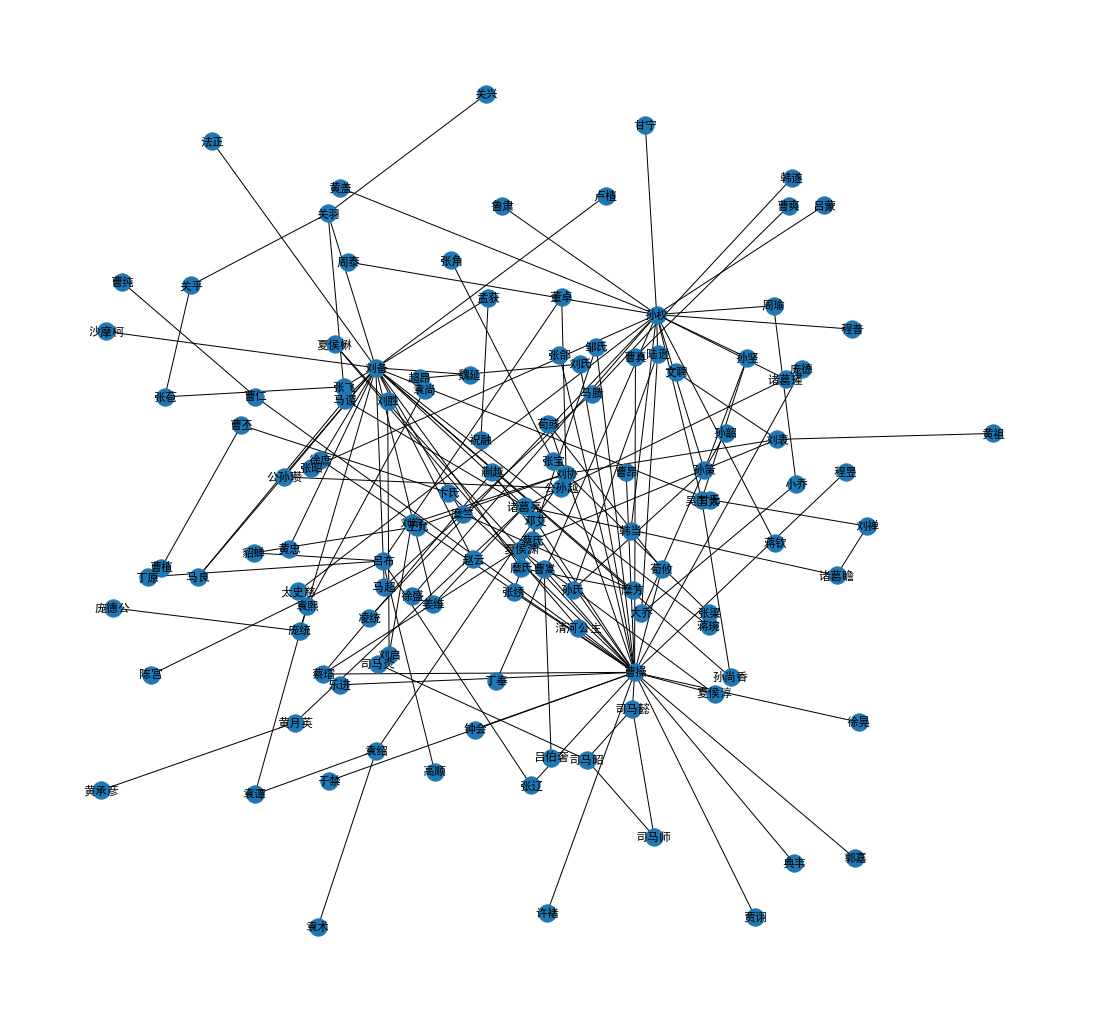

In [21]:
# 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(H, iterations=3, seed=5)
nx.draw(H, pos, with_labels=True)
plt.show()